In [36]:
import numpy as np
import os
import glob
import tensorflow as tf
from skimage import io
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.cm as cm
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
def get_path(directory):
    imgs = glob.glob(directory + '/images/*.tif')
    
    #a = [x.split('/')[-1].split('.')[0] for x in train]
    
    mask = glob.glob(directory + '/mask/*.gif')
    #b = [x.split('/')[-1].split('.')[0] for x in mask]
    
    gt = glob.glob(directory + '/1st_manual/*.gif')
    #c = [x.split('/')[-1].split('.')[0] for x in gt]
    
    return map(os.path.abspath, imgs), map(os.path.abspath, mask), map(os.path.abspath, gt)

train, mask_train, gt_train =  get_path('../Data/DRIVE/training')
test, mask_test, mask_gt = get_path('../Data/DRIVE/test')

In [38]:
# Hyper Params
total_patches = 400
num_training_images = len(train)
patches_per_image = total_patches/num_training_images
patch_dim = 31
num_patches = 0
current_img_index = -1
current_img = io.imread(train[0])
current_mask = img_as_float(io.imread(mask_train[0]))
current_gt = img_as_float(io.imread(gt_train[0]))
print patches_per_image

20


In [39]:
def load_next_img():
    global num_patches, current_img_index, current_img, current_mask, current_gt
    num_patches = 0
    current_img_index +=1
    if current_img_index < len(train):
        current_img = io.imread(train[current_img_index])
        current_mask = img_as_float(io.imread(mask_train[current_img_index]))
        current_gt = img_as_float(io.imread(gt_train[current_img_index]))
    else:
        print 'No more images left in set'

# size should be a factor of patches_per_image    
def next_batch(size):
    global num_patches
    count = 0
    batch_x = np.zeros((size, patch_dim**2*3))
    batch_y = np.zeros(size, dtype = 'uint8')
    while count < size:
        i = np.random.randint(0,current_img.shape[0])
        j = np.random.randint(0,current_img.shape[1])
        h = (patch_dim - 1)/2
        if not np.sum(current_mask[i-h:i+h+1,j-h:j+h+1])/patch_dim**2 < 1:
            batch_x[count] = np.reshape(current_img[i-h:i+h+1,j-h:j+h+1], -1)
            batch_y[count] = int(current_gt[i,j])
            count +=1
    num_patches += size
    if num_patches >= patches_per_image:
        load_next_img()
    return (batch_x, batch_y)

In [55]:
batch = next_batch(10)

In [56]:
x = batch[0]
y = batch[1]

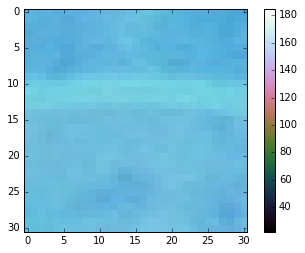

In [57]:
io.imshow(x[0].reshape([patch_dim,patch_dim,3]))

In [58]:
current_img.shape

(584, 565, 3)

In [59]:
current_img_index

1